In [83]:
%matplotlib inline
import pandas as pd
plt.rcParams["figure.figsize"]= (15,5)
movies_master=pd.read_csv('../data/movies.csv')
movies_data = movies_master.copy()

ratings_master=pd.read_csv('../data/ratings.csv')
ratings_data = ratings_master.copy()

In [84]:

from surprise import Dataset,SVD
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)

In [85]:

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8751


0.875139173275407

In [86]:

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.8857
RMSE: 0.8718
RMSE: 0.8811


In [87]:
from surprise import KNNBasic

sim_options = {'name': 'cosine',
               'user_based': True
}

algo = KNNBasic(k = 20, sim_options = sim_options, verbose = True)
# Run 5-fold cross-validation and print results
cv_cosine = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)



Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9675  0.9763  0.9782  0.9745  0.9763  0.9746  0.0037  
MAE (testset)     0.7418  0.7498  0.7545  0.7475  0.7506  0.7488  0.0042  
Fit time          0.19    0.17    0.14    0.23    0.18    0.18    0.03    
Test time         0.65    0.56    0.60    0.63    0.66    0.62    0.04    


In [88]:
# User Based Collaborative Filtering algorithm results
algo = KNNBasic(sim_options = {'algo':"pearson",'user_based': False })
cv_pearson= cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9073  0.9098  0.9072  0.9080  0.9097  0.9084  0.0011  
MAE (testset)     0.7009  0.7021  0.6954  0.6982  0.7003  0.6994  0.0024  
Fit time          5.56    3.02    4.28    3.76    3.56    4.03    0.86    
Test time         3.77    3.85    3.69    3.78    4.04    3.83    0.12    


In [89]:
sim_options = {'name': 'pearson_baseline',
               'shrinkage': 0  # no shrinkage
               }
algo = KNNBasic(sim_options=sim_options)
cv_pearson_base= cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9721  0.9867  0.9774  0.9836  0.9947  0.9829  0.0077  
MAE (testset)     0.7480  0.7571  0.7511  0.7590  0.7636  0.7558  0.0056  
Fit time          0.30    0.39    0.24    0.25    0.36    0.31    0.06    
Test time         1.17    0.97    0.69    0.83    0.68  

In [90]:
from surprise import BaselineOnly
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = BaselineOnly(bsl_options=bsl_options)
cv_SGD= cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9866  0.9823  0.9812  0.9936  0.9925  0.9872  0.0051  
MAE (testset)     0.7867  0.7798  0.7786  0.7907  0.7914  0.7854  0.0054  
Fit time          0.21    0.20    0.20    0.24    0.18    0.21    0.02    
Test time         0.05    0.05    0.04    0.38    0.04    0.11    0.13    


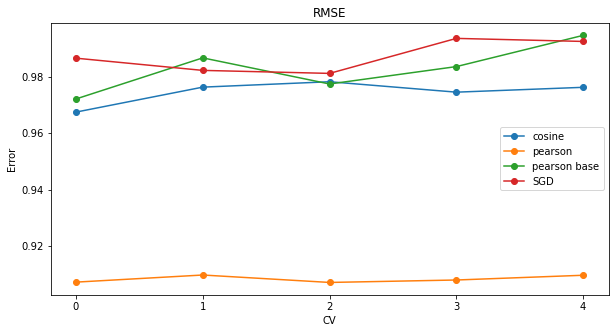

In [96]:
import numpy as np
import matplotlib.pyplot as plt


# Get data
rmse_cosine = cv_cosine['test_rmse']
rmse_pearson = cv_pearson['test_rmse']
rmse_pearson_base =cv_pearson_base['test_rmse']
rmse_SGD =cv_SGD['test_rmse']
x1 = np.arange(len(rmse_cosine))
x2 = np.arange(len(rmse_pearson))
x3 = np.arange(len(rmse_pearson_base))
x4 = np.arange(len(rmse_SGD))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x1+x2+x3+x4), max(x1+x2+x3+x4), 1.0))
plt.ylim(0,6, 1.3,0.2)
ax.plot(x1, rmse_cosine, marker='o', label="cosine")
ax.plot(x2, rmse_pearson, marker='o', label="pearson")
ax.plot(x3, rmse_pearson_base, marker='o', label="pearson base")
ax.plot(x4, rmse_SGD, marker='o', label="SGD")



# Chart setup
plt.title("RMSE", fontsize = 12)
plt.xlabel("CV", fontsize = 10)
plt.ylabel("Error", fontsize = 10)
plt.legend()
plt.show()

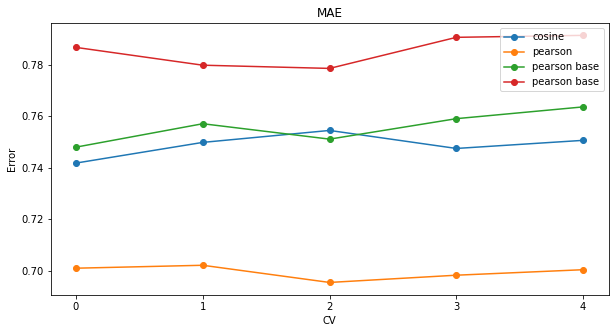

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Get data
mae_cosine = cv_cosine['test_mae']
mae_pearson = cv_pearson['test_mae']
mae_pearson_base =cv_pearson_base['test_mae']
mae_SGD =cv_SGD['test_mae']
x1 = np.arange(len(mae_cosine))
x2 = np.arange(len(mae_pearson))
x3 = np.arange(len(mae_pearson_base))
x4 = np.arange(len(mae_SGD))


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x1+x2+x3), max(x1+x2+x3), 1.0))
plt.ylim(0,6, 1.3,0.2)
ax.plot(x1, mae_cosine, marker='o', label="cosine")
ax.plot(x2, mae_pearson, marker='o', label="pearson")
ax.plot(x3, mae_pearson_base, marker='o', label="pearson base")
ax.plot(x3, mae_SGD, marker='o', label="pearson base")


# Chart setup
plt.title("MAE", fontsize = 12)
plt.xlabel("CV", fontsize = 10)
plt.ylabel("Error", fontsize = 10)
plt.legend()
plt.show()

In [93]:
# Without real rating
p1 = algo.predict(uid = '13', iid = '181', verbose = True)

user: 13         item: 181        r_ui = None   est = 3.50   {'was_impossible': False}


In [94]:
# With real rating
p2 = algo.predict(uid = '196', iid = '302', r_ui = 4, verbose = True)

user: 196        item: 302        r_ui = 4.00   est = 3.50   {'was_impossible': False}


In [95]:
print('User Based Collaborative Filtering algorithm result')
algo = KNNBasic(sim_options = {'algo':"pearson",'user_based': False })
cv = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

User Based Collaborative Filtering algorithm result
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9139  0.9042  0.9066  0.9129  0.9063  0.9088  0.0039  
MAE (testset)     0.7023  0.6972  0.6985  0.7051  0.6979  0.7002  0.0030  
Fit time          7.65    4.47    4.55    6.07    8.78    6.30    1.70    
Test time         4.09    5.41    6.21    6.94    5.45    5.62    0.95    
